<a href="https://colab.research.google.com/github/bloyal/Deep-Learning-with-Python/blob/main/Deep_Learning_with_Python_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 Classifying Movie Reviews

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0]


In [ ]:
train_labels[0]

1

In [ ]:

max([max(sequence) for sequence in train_data])

9999

Decode the reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 4.1.2 Preparing the Data

One-Hot Encode the sequences

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(x_train.shape)
print(x_train[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
print(y_train.shape)
print(y_train[1])

(25000,)
0.0


## 4.1.3 Building the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 4.1.4 Validating the approach

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 46ms/step - loss: 0.5494 - accuracy: 0.7683 - val_loss: 0.4264 - val_accuracy: 0.8691
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3443 - accuracy: 0.8995 - val_loss: 0.3247 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2496 - accuracy: 0.9239 - val_loss: 0.2982 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1933 - accuracy: 0.9423 - val_loss: 0.2775 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1538 - accuracy: 0.9531 - val_loss: 0.2744 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1269 - accuracy: 0.9621 - val_loss: 0.2871 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1043 - accuracy: 0.9696 - val_loss: 0.3003 - val_accuracy: 0.8847
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

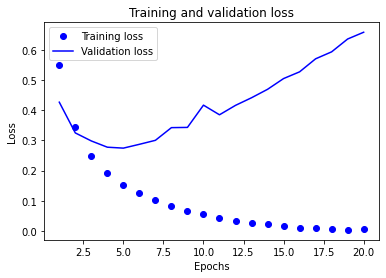

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

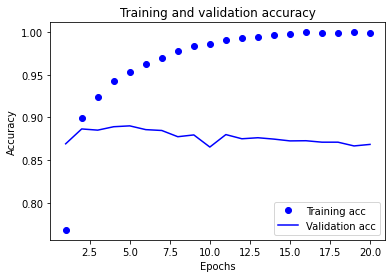

In [ ]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train a new model with 4 epochs to try and avoid overfitting

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4448 - accuracy: 0.8279
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2732 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2167 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2808 - accuracy: 0.8876


In [ ]:
results

[0.28077414631843567, 0.8876399993896484]

In [ ]:
# Generate predictions on new data

model.predict(x_test)

array([[0.17567468],
       [0.99928415],
       [0.8715508 ],
       ...,
       [0.10555029],
       [0.04747146],
       [0.49870315]], dtype=float32)

## 4.2 Classifying newswires: a multiclass classification example

In [ ]:
# Load the Reuters dataset

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

In [ ]:
# decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in 
                             train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[0]

3

4.2.2 Preparing the data

In [ ]:
# Vectorize the data using the same code as last time
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#one-hot encode the labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
#Using the built-in methods instead
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
#Build the model with larger layers to prevent information loss

model = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
# Set aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# train for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.6501 - accuracy: 0.5034 - val_loss: 1.7592 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4403 - accuracy: 0.6994 - val_loss: 1.3004 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0500 - accuracy: 0.7811 - val_loss: 1.1253 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8244 - accuracy: 0.8237 - val_loss: 1.0463 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6592 - accuracy: 0.8569 - val_loss: 0.9573 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5288 - accuracy: 0.8908 - val_loss: 0.9253 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4277 - accuracy: 0.9142 - val_loss: 0.8857 - val_accuracy: 0.8060
Epoch 8/20
16

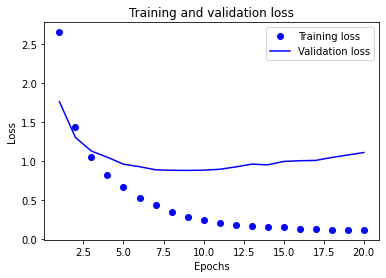

In [ ]:
# display loss and accuracy curves

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

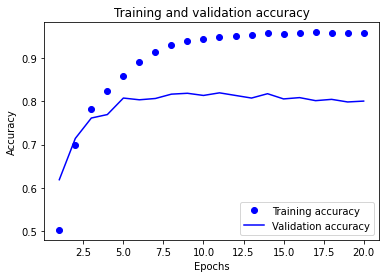

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Train a new model for 9 epochs to avoid overfitting

model = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")
                          ])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
250/250 [==============================] - 3s 11ms/step - loss: 1.4567 - accuracy: 0.6879 - val_loss: 1.0115 - val_accuracy: 0.7850
Epoch 2/9
250/250 [==============================] - 2s 10ms/step - loss: 0.7450 - accuracy: 0.8363 - val_loss: 0.8929 - val_accuracy: 0.8160
Epoch 3/9
250/250 [==============================] - 2s 10ms/step - loss: 0.4685 - accuracy: 0.8966 - val_loss: 0.8688 - val_accuracy: 0.8240
Epoch 4/9
250/250 [==============================] - 3s 10ms/step - loss: 0.3245 - accuracy: 0.9291 - val_loss: 0.9452 - val_accuracy: 0.8140
Epoch 5/9
250/250 [==============================] - 2s 10ms/step - loss: 0.2550 - accuracy: 0.9437 - val_loss: 0.9539 - val_accuracy: 0.8200
Epoch 6/9
250/250 [==============================] - 2s 10ms/step - loss: 0.2121 - accuracy: 0.9496 - val_loss: 1.1698 - val_accuracy: 0.8010
Epoch 7/9
250/250 [==============================] - 2s 10ms/step - loss: 0.1926 - accuracy: 0.9520 - val_loss: 1.1943 - val_accuracy: 0.8100
Epoch 

In [ ]:
results

[1.5001041889190674, 0.7853962779045105]

In [ ]:
# 78% accuracy isn't horrible. What would a random classifier look like?

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1745325022261799

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
#predictions for a given sample sum to 1
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

A different way to handle labels and loss

In [ ]:
# instead of 1-hot encoding the labels, we can instad cast them as an integer tensor

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
#This requires a different loss function in the model

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# What happens if your intermediate layers are too small?

model = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(4, activation="relu"),
                          layers.Dense(46, activation="softmax")
                          ])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)
          )

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.9496 - accuracy: 0.3398 - val_loss: 2.3876 - val_accuracy: 0.3530
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 2.1236 - accuracy: 0.3517 - val_loss: 1.9070 - val_accuracy: 0.3540
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.7147 - accuracy: 0.5157 - val_loss: 1.6395 - val_accuracy: 0.5700
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.5291 - accuracy: 0.5900 - val_loss: 1.5720 - val_accuracy: 0.5850
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.4428 - accuracy: 0.6086 - val_loss: 1.5760 - val_accuracy: 0.5940
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3770 - accuracy: 0.6190 - val_loss: 1.5312 - val_accuracy: 0.6100
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2940 - accuracy: 0.6249 - val_loss: 1.5310 - val_accuracy: 0.6000
Epoch 8/20
63

## 4.3 Predicting house prices: a regression example

In [2]:
## 4.3 Predicting house prices: a regression example

In [3]:
# load the Boston Housing dataset

from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [ ]:
train_targets

In [8]:
# run feature-wise normalization of the data

#Calculate statistics of training data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# Normalize the training data
train_data -= mean
train_data /= std

# Normalize the test data
test_data -= mean
test_data /= std

In [18]:
# build your model (a small one, since there are few samples)

def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation="relu"),
                            layers.Dense(64, activation="relu"),
                            layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",
                loss="mse",
                metrics=["mae"])
  return model

Since there are so few samples in the data set, rather than using a dedicated 20% or so of them as a hold-out, we use K-fold cross validations

In [19]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [20]:
all_scores

[1.9408248662948608, 2.6211390495300293, 2.55370831489563, 2.492931365966797]

In [21]:
np.mean(all_scores)

2.4021508991718292

In [22]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


KeyboardInterrupt: ignored

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
# Smooth the curve for easier viewing
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [23]:
# Train the final model with 80 epochs
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.7995 - mae: 2.6373


In [24]:
test_mae_score

2.637286901473999

In [25]:
predictions = model.predict(test_data)

In [26]:
predictions[0]

array([8.444625], dtype=float32)

In [27]:
# We're off by about $8,440